# Visu 5: Profile along the edge for width computation

## Setup

### Imports

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import os
import unittest
from random import choice
from matplotlib.pyplot import figure

from amftrack.util.sys import (
    update_plate_info_local,
    update_plate_info,
    get_current_folders_local,
    get_current_folders,
    test_path,
)
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    Edge,
    Node,
)
from amftrack.pipeline.functions.image_processing.extract_width_fun import (
    generate_pivot_indexes,
    compute_section_coordinates,
    find_source_images_filtered,
    extract_section_profiles_for_edge,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    plot_edge,
)
from amftrack.util.geometry import generate_index_along_sequence
from amftrack.pipeline.functions.image_processing.extract_width_fun import (
    compute_edge_width_profile,
    extract_section_profiles_for_edge,
)
from amftrack.util.plot import pixel_list_to_matrix
from amftrack.pipeline.functions.image_processing.experiment_util import (
    plot_full_image_with_features,
)
from amftrack.util.geometry import get_bounding_box

In [4]:
directory = test_path
plate_name = "20220330_2357_Plate19"  # TODO(FK): find the name automaticaly (can be different based on the person)
update_plate_info(directory)
folder_df = get_current_folders(directory)
selected_df = folder_df.loc[folder_df["folder"] == plate_name]
i = 0
# directory_name = folder_list[i]
exp = Experiment(directory)
exp.load(selected_df, suffix="")
exp.load_tile_information(0)

analysed:   0%|          | 0/42 [00:00<?, ?it/s]

2022-03-30 23:57:00
1
1


### Utils

In [5]:
f = lambda n: generate_index_along_sequence(n, resolution=30, offset=5)
f_profiles = lambda edge: extract_section_profiles_for_edge(
    exp, 0, edge, resolution=5, offset=4, step=3
)

In [29]:
def plot_segments_on_image(segments):
    for (point1, point2) in segments:
        plt.plot(
            [point1[1], point2[1]],  # x1, x2
            [point1[0], point2[0]],  # y1, y2
            color="white",
            linewidth=2,
        )

### Previus edge used for presentation

## I/ Visualisation of Edge sections

### Chose edges

In [12]:
edges = []
for i in range(3):
    edge = get_random_edge(exp, 0)
    edges.append(edge)

In [13]:
for i in range(3):
    print(len(edges[i].pixel_list(0)))

156
243
41


In [31]:
print(edges)

[Edge(1257,1275), Edge(1014,1085), Edge(954,951)]


### Plot the skeletton raw

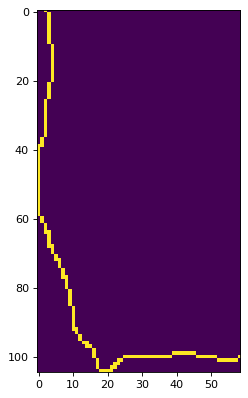

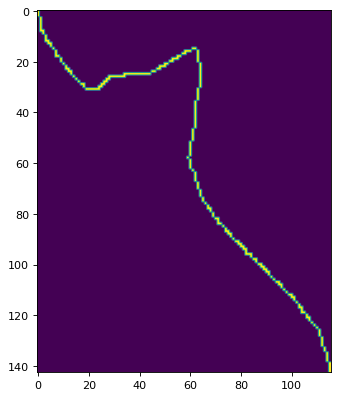

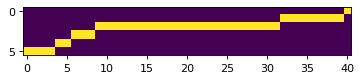

In [14]:
for i in range(3):
    figure(figsize=(18, 6), dpi=80)
    plt.subplot(1, 3, i + 1)
    plt.imshow(pixel_list_to_matrix(edges[i].pixel_list(0)))

### Extract slices

In [15]:
results = []
results_seg = []
for i in range(3):
    slices, _, segments = extract_section_profiles_for_edge(
        exp, 0, edges[i], step=5, resolution=30
    )
    results.append(slices)
    results_seg.append(segments)

In [16]:
results

[array([[163., 162., 162., 160., 157., 157., 157., 157., 157., 157., 157.,
         156., 152., 151., 151., 151., 149., 148., 147., 148., 146., 144.,
         142., 141., 141., 137., 139., 140., 138., 139., 139., 139., 141.,
         139., 137., 139., 136., 135., 135., 134., 132., 133., 131., 131.,
         129., 127., 127., 126., 125., 125., 125., 124., 123., 123., 124.,
         122., 119., 118., 115., 113., 111., 108., 107., 109., 108., 107.,
         108., 107., 107., 108., 111., 115., 115., 118., 120., 126., 128.,
         130., 135., 138., 142., 145., 145., 151., 150., 156., 158., 161.,
         165., 167., 168., 170., 169., 168., 166., 169., 171., 169., 170.,
         173., 172., 169., 166., 166., 163., 158., 155., 151., 146., 143.,
         136., 129., 126., 120., 114., 111., 109., 110., 111., 114.],
        [135., 137., 139., 138., 142., 146., 149., 153., 156., 156., 160.,
         163., 164., 165., 168., 172., 175., 173., 173., 178., 175., 173.,
         175., 173., 171., 168

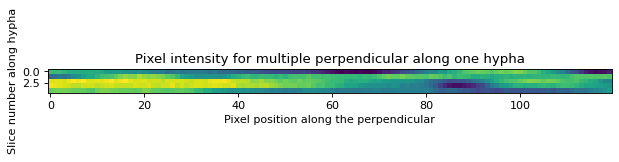

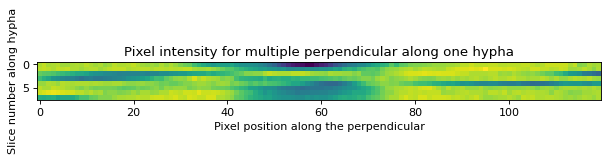

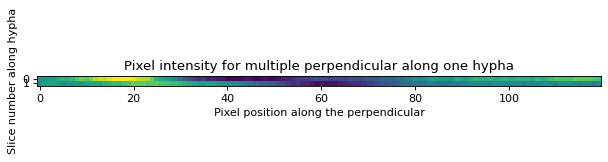

In [17]:
for i in range(0, 3):
    figure(figsize=(20, 6), dpi=80)
    plt.subplot(2, 2, i + 1)
    plt.imshow(results[i])
    plt.ylabel("Slice number along hypha")
    plt.xlabel("Pixel position along the perpendicular")
    plt.title("Pixel intensity for multiple perpendicular along one hypha")

In [19]:
results[i].shape

(2, 120)

### Visualize singular slices

#### All edges

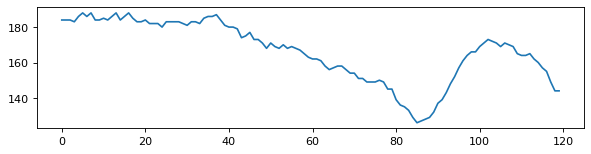

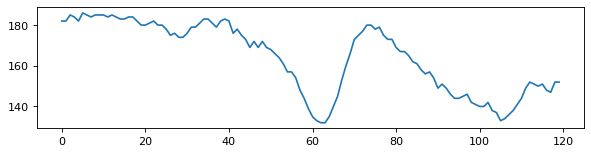

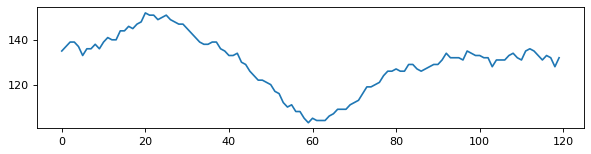

In [20]:
for i in range(0, 3):
    index = results[i].shape[0] // 2  # slice in the middle
    figure(figsize=(30, 2), dpi=80)
    plt.subplot(1, 3, i + 1)
    plt.plot(results[i][index])

#### Slices along an hypha

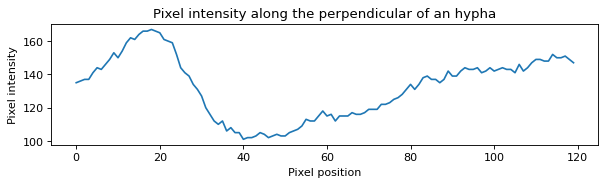

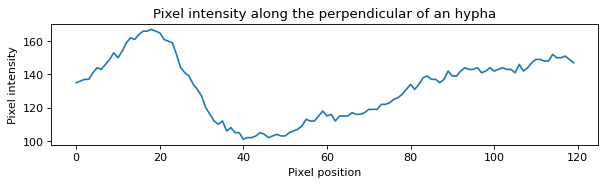

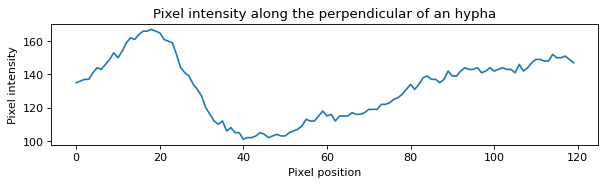

In [25]:
i = 2
for j, index in enumerate([0, 5, 18]):
    index = 0
    figure(figsize=(30, 2), dpi=80)
    plt.subplot(1, 3, j + 1)
    plt.plot(results[i][index])
    plt.title("Pixel intensity along the perpendicular of an hypha")
    plt.ylabel("Pixel intensity")
    plt.xlabel("Pixel position")

### Visualize points along the edge

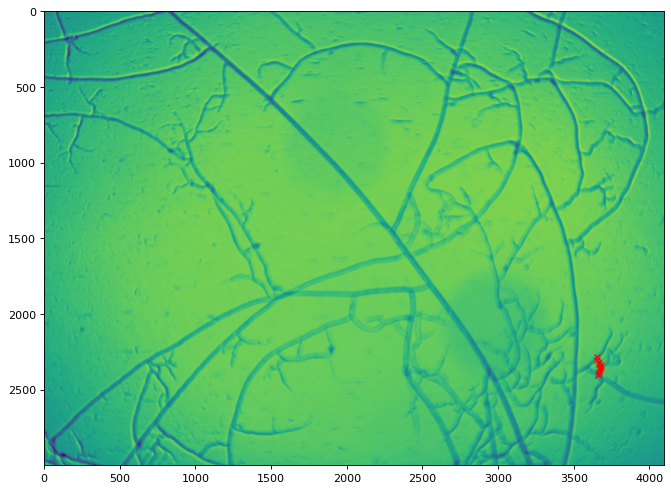

In [15]:
# %matplotlib notebook
i = 0
figure(figsize=(10, 8), dpi=80)
plot_edge(edges[i], 0, mode=2)

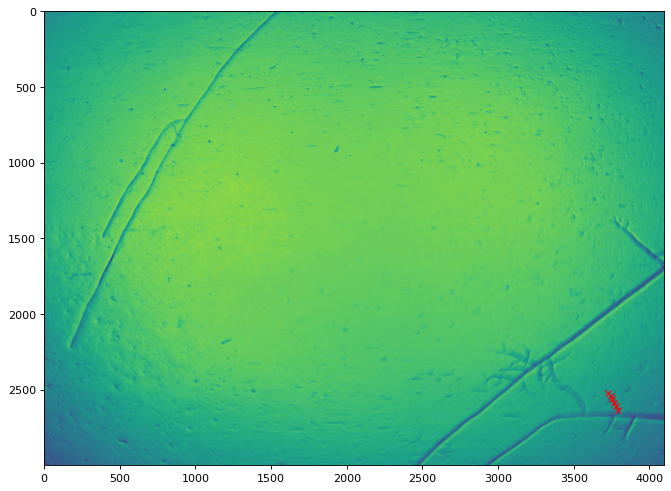

In [16]:
#%matplotlib notebook
i = 1
figure(figsize=(10, 8), dpi=80)
plot_edge(edges[i], 0, mode=3, f=f)

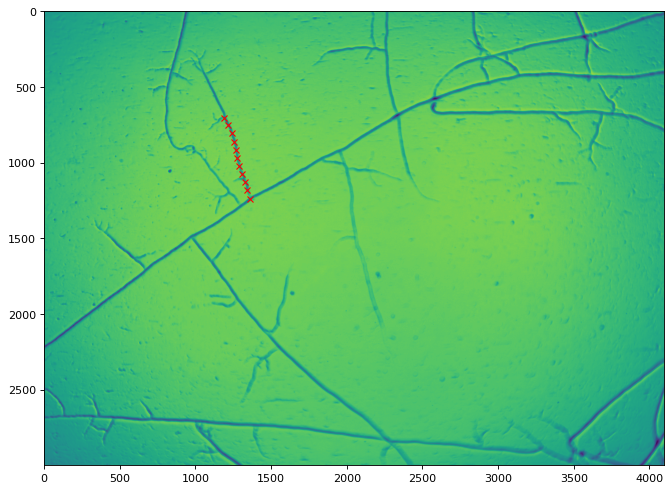

In [18]:
#%matplotlib notebook
i = 2
figure(figsize=(10, 8), dpi=80)
plot_edge(edges[i], 0, mode=2)

### Plot extraction segments

<IPython.core.display.Javascript object>


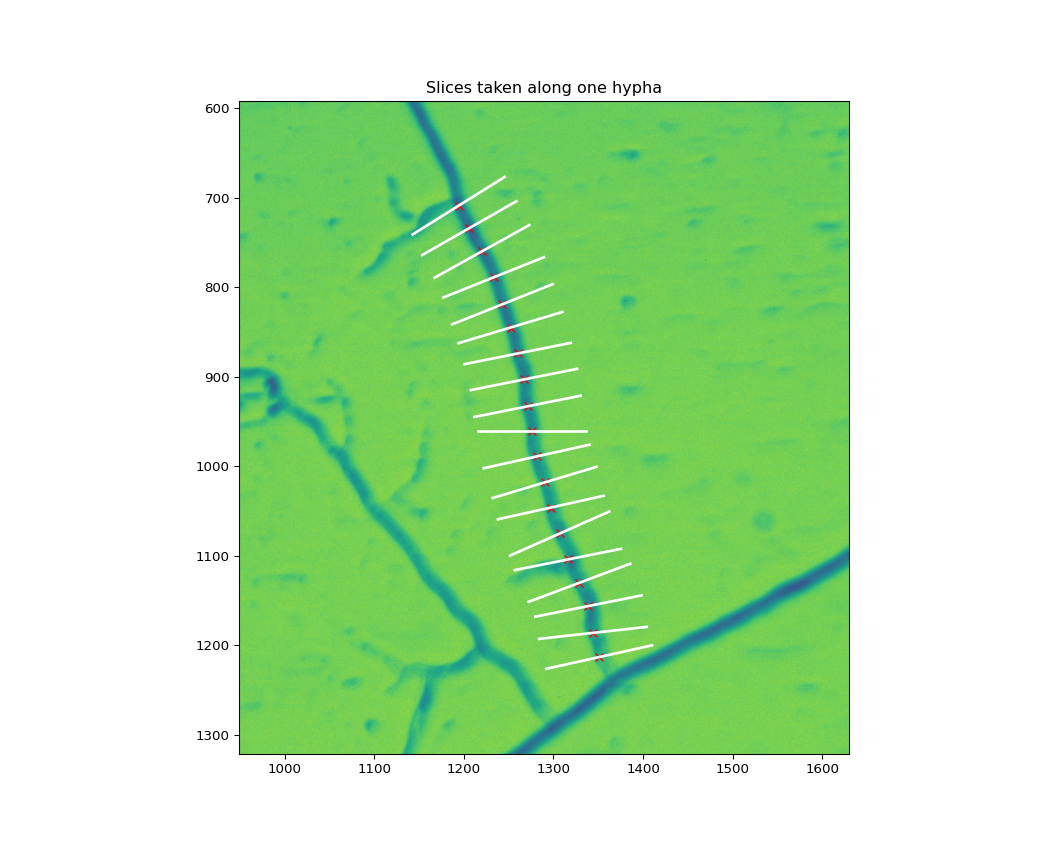

Text(0.5, 1.0, 'Slices taken along one hypha')

In [35]:
%matplotlib notebook
i = 2
figure(figsize=(10, 8), dpi=80)
plot_edge(edges[i], 0, mode=3, f=f)
plot_segments_on_image(results_seg[i])
plt.title("Slices taken along one hypha")

### Plot edge skeletton in its original image

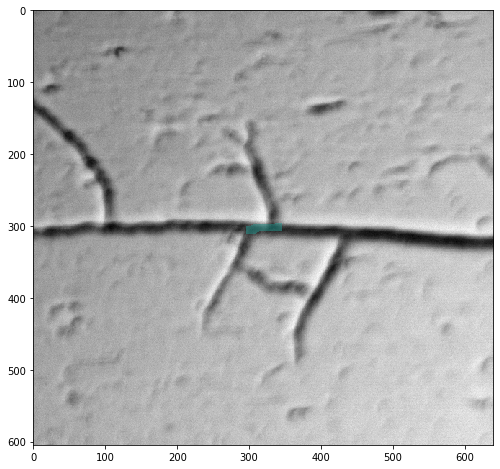

Text(0.5, 1.0, 'Thinned skeletonization of an hypha')

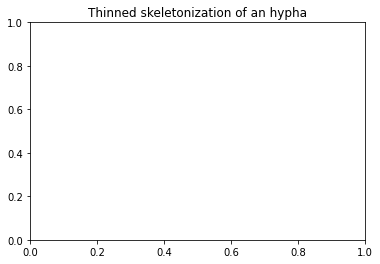

In [30]:
pixels = edges[2].pixel_list(0)
region = get_bounding_box(pixels, margin=300)
plot_full_image_with_features(
    exp, 0, edges=[edges[2]], downsizing=1, dilation=10, region=region
)
plt.title("Thinned skeletonization of an hypha")

## II/ Statistic on length of Edges

### Basic stats

In [38]:
def get_all_edges(exp, t):
    (G, pos) = exp.nx_graph[t], exp.positions[t]
    return [
        Edge(Node(edge_coord[0], exp), Node(edge_coord[1], exp), exp)
        for edge_coord in list(G.edges)
    ]

In [39]:
a = get_all_edges(exp, 0)

In [40]:
def get_all_length(exp, t):
    a = get_all_edges(exp, t)
    return [len(a[i].pixel_list(0)) for i in range(len(a))]

In [41]:
l = np.array(get_all_length(exp, 0))

(array([33., 13.,  6.,  1.,  0.,  3.,  1.,  2.,  1.,  1.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

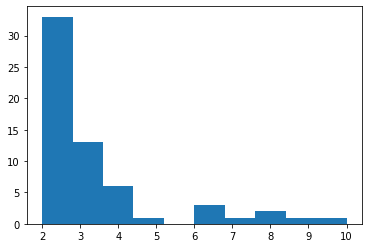

In [42]:
plt.hist(l, range=(2, 10))

(array([12., 10.,  9., 21., 15., 18., 15., 15., 12., 18.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

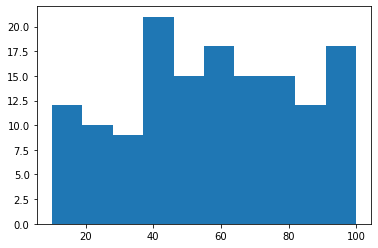

In [43]:
plt.hist(l, range=(10, 100))

(array([122.,  83., 102.,  51.,  37.,  34.,  22.,  18.,  13.,  20.,   9.,
         12.,   5.,   8.,   6.,   5.,   7.,   8.,   2.,   5.,   3.,   1.,
          4.,   4.,   7.,   2.,   1.,   2.,   2.,   3.,   2.,   0.,   0.,
          0.,   1.,   2.,   0.,   0.,   0.,   0.]),
 array([1.000000e+00, 5.097500e+01, 1.009500e+02, 1.509250e+02,
        2.009000e+02, 2.508750e+02, 3.008500e+02, 3.508250e+02,
        4.008000e+02, 4.507750e+02, 5.007500e+02, 5.507250e+02,
        6.007000e+02, 6.506750e+02, 7.006500e+02, 7.506250e+02,
        8.006000e+02, 8.505750e+02, 9.005500e+02, 9.505250e+02,
        1.000500e+03, 1.050475e+03, 1.100450e+03, 1.150425e+03,
        1.200400e+03, 1.250375e+03, 1.300350e+03, 1.350325e+03,
        1.400300e+03, 1.450275e+03, 1.500250e+03, 1.550225e+03,
        1.600200e+03, 1.650175e+03, 1.700150e+03, 1.750125e+03,
        1.800100e+03, 1.850075e+03, 1.900050e+03, 1.950025e+03,
        2.000000e+03]),
 <BarContainer object of 40 artists>)

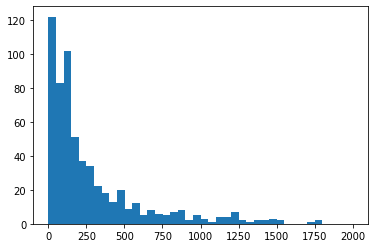

In [44]:
plt.hist(l, bins=40, range=(1, 2000))

In [45]:
np.max(l)

4160

In [46]:
np.min(l)

2

In [47]:
np.sum(l == 2)

33

In [48]:
np.sum(l == 100)

2

### Proportion of network in each category

In [91]:
effectif = np.bincount(l)

In [92]:
weight = [effectif[i] * i for i in range(len(effectif))]

In [93]:
cum_weight = np.cumsum(weight)

In [94]:
cum_weight_normalized = cum_weight / np.max(cum_weight)

<IPython.core.display.Javascript object>


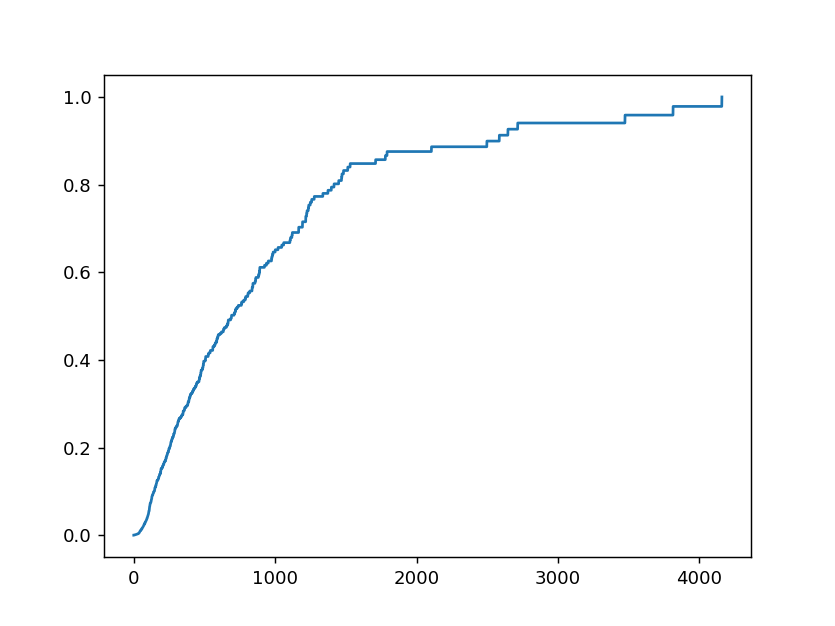

In [95]:
plt.plot(cum_weight_normalized)
# plt.xlim([2, 30])

### Find the lower bound

In [98]:
j = 0
while cum_weight_normalized[j] < 0.05:
    j += 1
print(j)

105


In [99]:
j = 0
while cum_weight_normalized[j] < 0.1:
    j += 1
print(j)

143


We still have 5% of the network length if we restrict to edges longer than 100 pixels in the pixel list